## Import Libraries

In [ ]:
import google.colab
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BTL ML')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,StratifiedKFold


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Reading

In [ ]:
## load data
data = pd.read_csv('heart_statlog_cleveland_hungary_final_ieee_datapot.csv')

In [ ]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Preprocessing && EDA

### Data Cleaning

In [ ]:
data.info() # no null samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


NX: các mẫu dữ liệu không bị thiếu, nếu thiếu thì sử dụng kĩ thuật như: loại bỏ, thay thế, gắn cờ hoặc phân tích riêng




In [ ]:
duplicates = data.duplicated().sum()
print(f"Số lượng dòng trùng lặp: {duplicates}")

Số lượng dòng trùng lặp: 272


In [ ]:
# check duplicated samples
duplicates = data[data.duplicated(keep=False)]

print("Các dòng trùng lặp hoàn toàn:")
duplicates

Các dòng trùng lặp hoàn toàn:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [ ]:
# remove duplicated samples
data = data.drop_duplicates()

In [ ]:
data.shape

(918, 12)

NX: dữ liệu 1190 mẫu giảm còn 918 mẫu vì trùng lặp


In [ ]:
# summary statistic
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


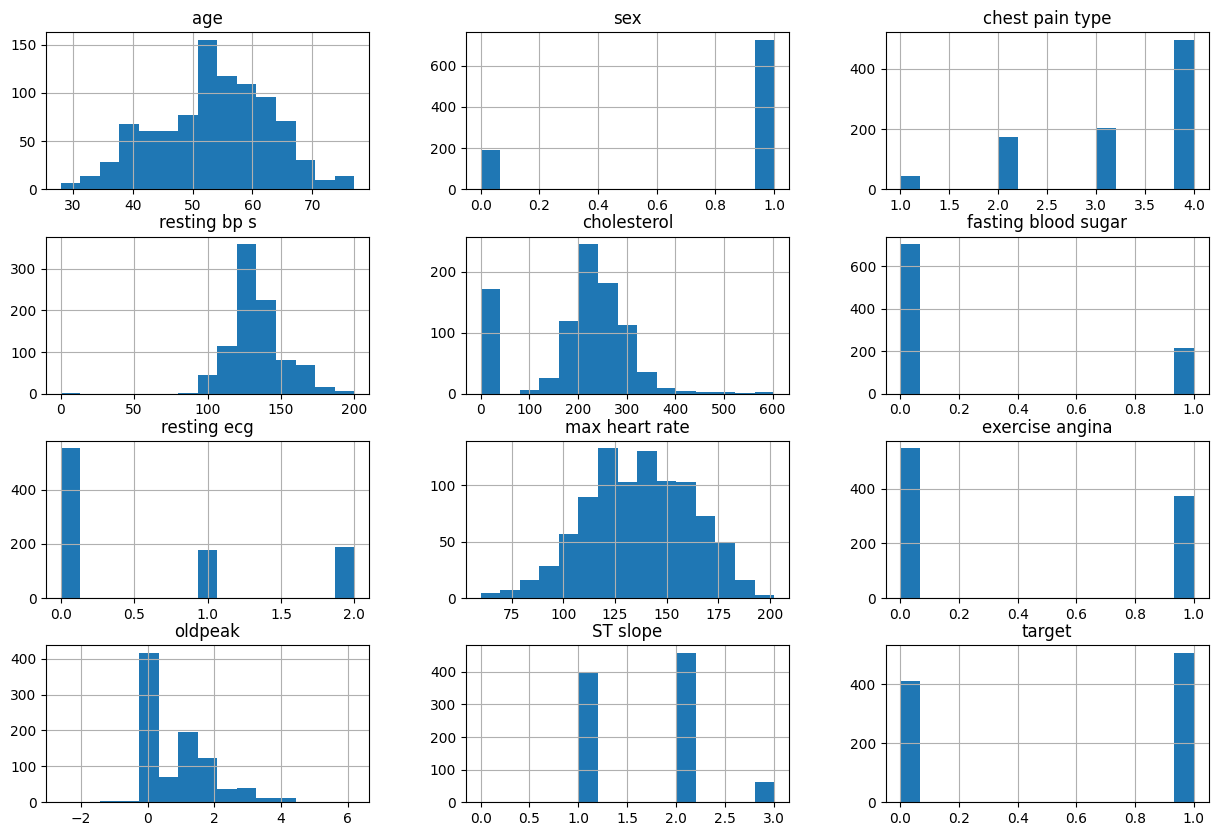

In [ ]:
# understanding columns attributes
data.hist(bins=15, figsize=(15, 10))
plt.show()



1.   age: chạy từ 28 đến 77
2.   sex: 1 = nam, 0 = nữ
3.   chest pain type: kiểu đau ngực: 1 = đau điển hình, 2 = đau ngực không điển hình, 3 = đau không phải đau thắt ngực, 4 = không có triệu chứng
4.   !resting bp s: huyết áp khi nghỉ ngơi: 0 -> 200 mm/Hg
5.   !cholesterol: nồng độ cholesterol: 0 -> 603 mg/dl
6.   fasting blood sugar: lượng đường trong máu lúc đói: >120mg/dl = 1 else 0
7.   resting ecg: kết quả điện tâm đồ khi nghỉ ngơi: 0 = bình thường , 1 = có bất thường sóng ST-T, 2 = có khả năng hoặc chắc chắn tăng huyết áp tâm thất trái theo tiêu chuẩn Estes
8.   max heart rate: 60 -> 202
9.   exercise angina: có bị đau thắt ngực khi tập thể dục không: 1 = có, 0 = không
10.  old peak: chỉ số ST lúc tập thể thao so với lúc thư giãn: -2.6 -> 6.2
11.  !ST slope: độ dốc của đoạn ST(ST là đoạn ST trong điện tâm đồ) đỉnh trong bài kiểm tra gắng sức: 1 = dốc lên, 2 = phẳng, 3 = dốc xuống
12.  target: 0 = bình thường, 1 = có bệnh
      





In [ ]:
data["ST slope"].unique()

array([1, 2, 3, 0])

In [ ]:
st_slope_counts = data['ST slope'].value_counts()
st_slope_counts

,count
ST slope,
2,459
1,395
3,63
0,1


NX: cột "st_slope" có giá trị 0 - mà theo dữ liệu cột
này chỉ có các giá trị nomial là 1,2,3, tức nó đang là giá trị bất thường. Thêm nữa chỉ có 1 mẫu bị như thế nên ta loại bỏ nó hoặc thay bằng mode


In [ ]:
data = data[data["ST slope"] != 0]

In [ ]:
data.shape

(917, 12)

Vậy số lượng mẫu còn 917

Xử lý huyết áp khi nghỉ có giá trị 0 mm/HG và nồng độ cholesterol có giá trị 0
mg/dl - giá trị không hợp lệ - invalid data

In [ ]:
# kiểm tra số lượng invalid data
invalid_bp = data[data['resting bp s'] == 0]
invalid_chol = data[data['cholesterol'] == 0]
print(f"Số giá trị resting bp = 0: {len(invalid_bp)}")
print(f"Số giá trị cholesterol = 0: {len(invalid_chol)}")

Số giá trị resting bp = 0: 1
Số giá trị cholesterol = 0: 172


In [ ]:
# Xử lý resting bp s = 0 (1 giá trị)
# Tính trung vị của các giá trị hợp lệ
median_bp = data.loc[data['resting bp s'] != 0, 'resting bp s'].median()

# Thay thế giá trị 0 bằng trung vị
data.loc[data['resting bp s'] == 0, 'resting bp s'] = median_bp

In [ ]:
# Xử lý Cholesterol = 0 (172 giá trị)
# Tính trung vị cho các giá trị cholesterol hợp lệ
median_chol = data.loc[data['cholesterol'] != 0, 'cholesterol'].median()

# Thay thế giá trị cholesterol bằng 0 bằng trung vị
data.loc[data['cholesterol'] == 0, 'cholesterol'] = median_chol

In [ ]:
print("Dữ liệu sau xử lý:")
print(data[['resting bp s', 'cholesterol']].describe())

Dữ liệu sau xử lý:
       resting bp s  cholesterol
count    917.000000   917.000000
mean     132.519084   243.257361
std       17.990685    53.406667
min       80.000000    85.000000
25%      120.000000   214.000000
50%      130.000000   237.000000
75%      140.000000   267.000000
max      200.000000   603.000000


Sau xử lý dữ liệu không hợp lệ, resting bp s chạy từ 80 đến 200mm/HG, cholesterol chạy từ 85 đến 603mg/dl:

In [ ]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.495093,0.789531,3.251908,132.519084,243.257361,0.232279,0.604144,136.814613,0.404580,0.888332,1.63795,0.552890
std,9.425601,0.407864,0.931502,17.990685,53.406667,0.422517,0.806161,25.473732,0.491078,1.066749,0.60727,0.497466
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.00000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,237.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.00000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.00000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,1.000000


### EDA

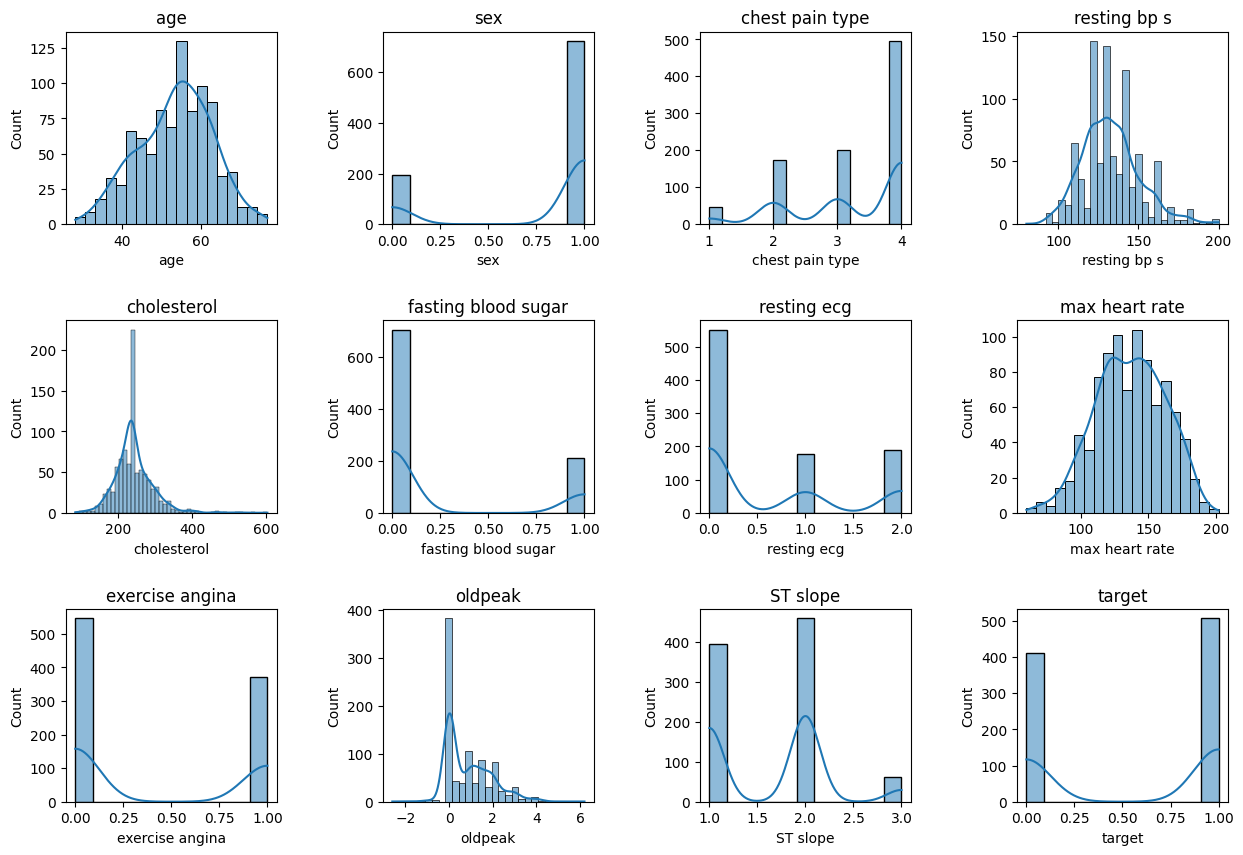

In [ ]:
# Kiểm tra phân phối các thuộc tính
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # 3 dòng và 4 cột
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Điều chỉnh khoảng cách giữa các biểu đồ

# Lặp qua các cột của dữ liệu
for i, column in enumerate(data.columns):
    row = i // 4  # Xác định chỉ số dòng (3 dòng)
    col = i % 4   # Xác định chỉ số cột (4 cột)
    sns.histplot(data=data[column], ax=axs[row, col], kde=True)
    axs[row, col].set_title(column)

plt.show()

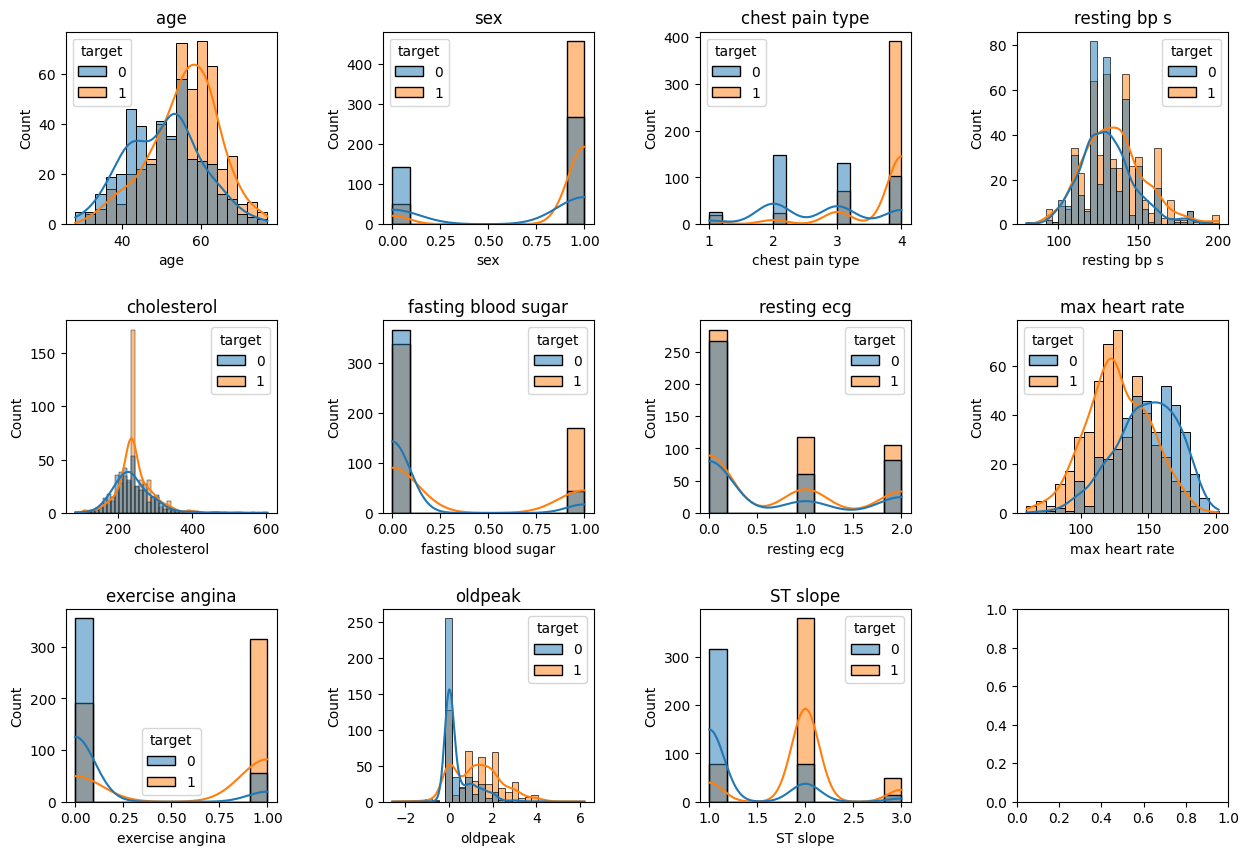

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(data.columns):
    if column != 'target':
        row = i // 4
        col = i % 4
        sns.histplot(data=data, x=column, ax=axs[row, col], hue="target", kde=True)
        axs[row, col].set_title(column)
plt.show()

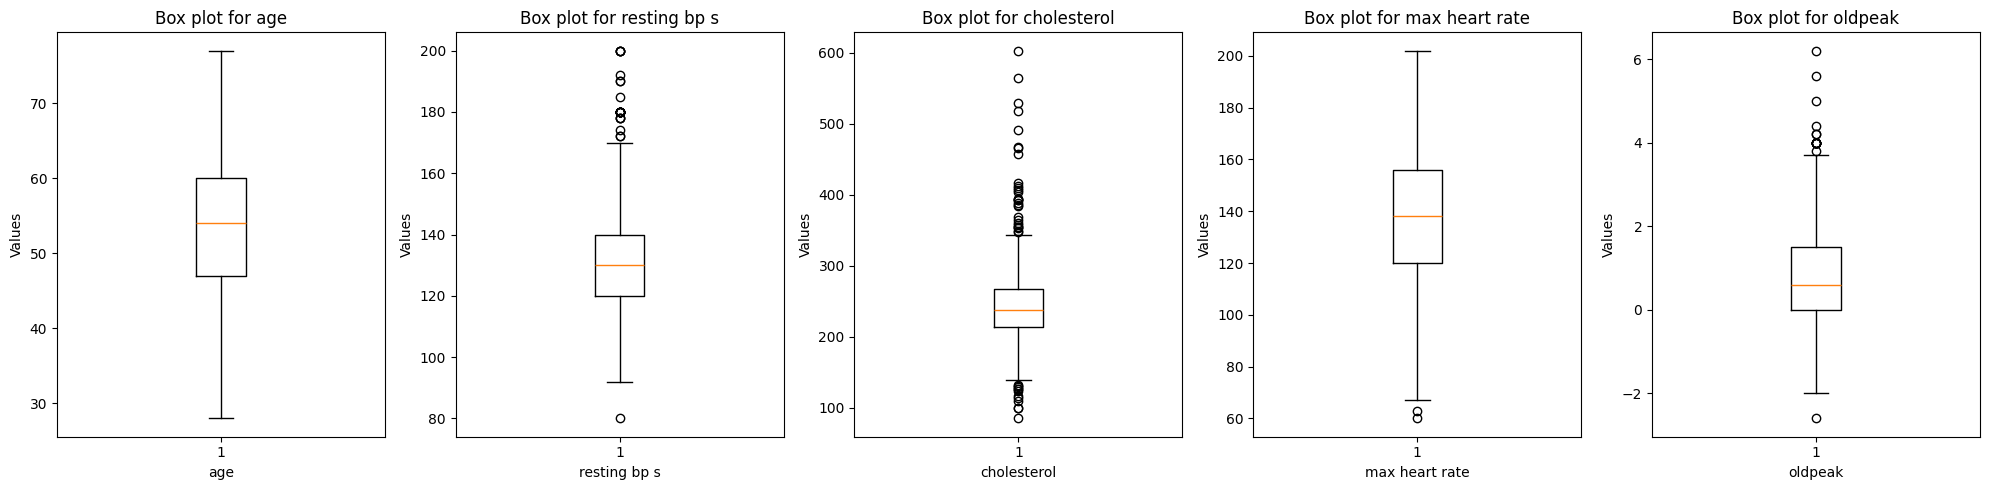

In [ ]:
# Kiểm tra outliers với box plot
# Danh sách các cột số
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Tạo figure và các subplot trên cùng một hàng
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 5))

# Vẽ các box plot
for i, column in enumerate(numerical_cols):
    axes[i].boxplot(data[column])
    axes[i].set_title(f'Box plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
# Loại bỏ outlier của cột max heart rate, resting bp s, cholesterol, oldpeak bằng pp IQR
from scipy.stats import zscore
for col in ['max heart rate','resting bp s','cholesterol', 'oldpeak']:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  836 non-null    int64  
 1   sex                  836 non-null    int64  
 2   chest pain type      836 non-null    int64  
 3   resting bp s         836 non-null    int64  
 4   cholesterol          836 non-null    int64  
 5   fasting blood sugar  836 non-null    int64  
 6   resting ecg          836 non-null    int64  
 7   max heart rate       836 non-null    int64  
 8   exercise angina      836 non-null    int64  
 9   oldpeak              836 non-null    float64
 10  ST slope             836 non-null    int64  
 11  target               836 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 84.9 KB


Sau khi loại bỏ outliers của 4 cột, dữ liệu còn 836 mẫu.

In [ ]:
# kiểm tra sự cân bằng dữ liệu
heart_target = data["target"].value_counts()
heart_target

,count
target,
1,453
0,383


 Dữ liệu cân bằng nghĩa là cột target của class A và B nên theo tỷ lệ 50:50 hoặc 60:40. Khi tỷ lệ class A và B là 80:20 hay 90:10 thì được coi là không cân bằng. Việc dữ liệu cân bằng sẽ giúp việc huấn luyện mô hình chính xác hơn, tránh trường hợp overfitting
-> NX: dữ liệu khá cân bằng

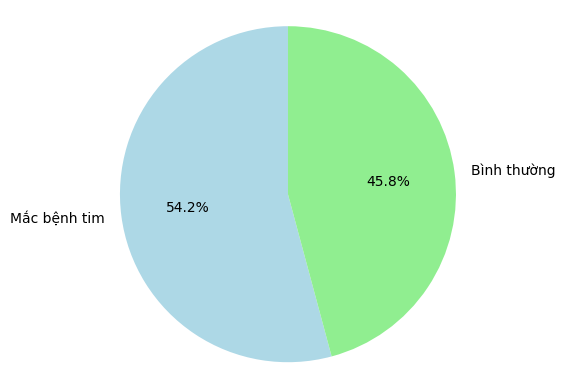

In [ ]:
labels = ['Mắc bệnh tim', 'Bình thường']
sizes = heart_target

# Tạo biểu đồ tròn
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])

# Hiển thị biểu đồ tròn
plt.axis('equal')
plt.show()

### Phân tích tương quan

Dùng tương quan Pearson đo lường mối quan hệ tuyến tính giữa các biến numeric

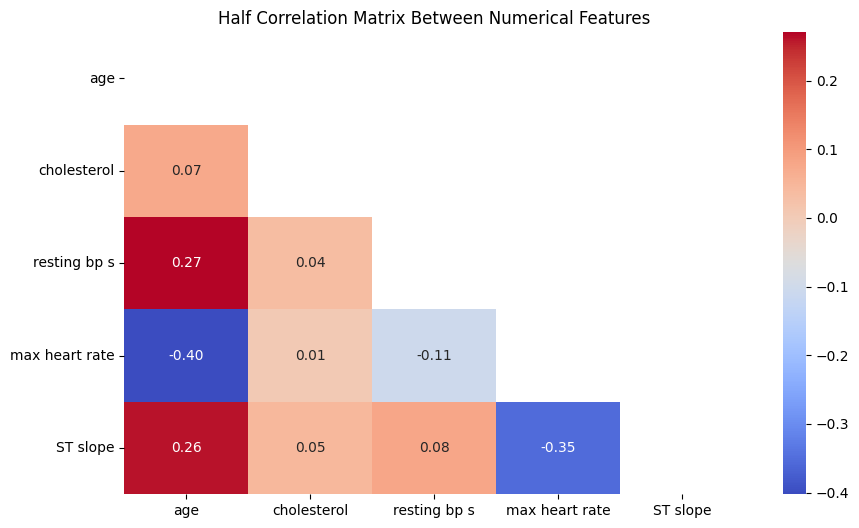

In [ ]:
numeric_cols = ['age', 'cholesterol', 'resting bp s', 'max heart rate', 'ST slope']
correlation_matrix = data[numeric_cols].corr()
# Tạo một mask để chỉ hiển thị nửa dưới của ma trận
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Half Correlation Matrix Between Numerical Features')
plt.show()

Dùng tương quan Point Biserial cho thuộc tính numeric và biến target - nhị phân

In [ ]:
results = {}
for col in numeric_cols:
    r_pb, p_value = pointbiserialr(data[col], data["target"])
    results[col] = {'r_pb': r_pb, 'p_value': p_value}

# Hiển thị kết quả dưới dạng DataFrame
results_df = pd.DataFrame(results).T
results_df.columns = ['Point Biserial Correlation', 'P-value']

# Xuất kết quả
print("Point Biserial Correlation Between Numeric Features And Target:")
print(results_df)

Point Biserial Correlation Between Numeric Features And Target:
                Point Biserial Correlation       P-value
age                               0.289928  1.181141e-17
cholesterol                       0.100360  3.675335e-03
resting bp s                      0.109811  1.473288e-03
max heart rate                   -0.406747  1.192565e-34
ST slope                          0.560991  1.779872e-70


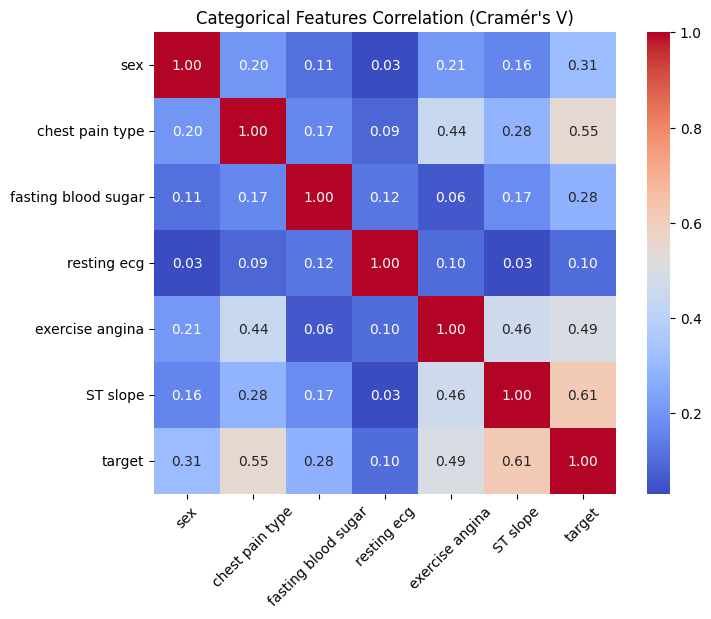

In [ ]:
# tương quan giữa các biến categorical
# Hàm tính Cramér's V
def cramerV(label, x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    try:
        if min((kcorr - 1), (rcorr - 1)) == 0:
            return 0
        else:
            return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    except:
        return 0

# Hàm vẽ heatmap Cramér's V
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 == col2:
                cramer.loc[col1, col2] = 1.0
            else:
                cramer.loc[col1, col2] = cramerV(df[col1], df[col2])
    cramer = cramer.astype(float)

    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cramer, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True
    )
    plt.title("Categorical Features Correlation (Cramér's V)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar',
                    'resting ecg', 'exercise angina', 'ST slope', 'target']
categorical_df = data[categorical_cols]  # Chọn các biến phân loại từ DataFrame
plot_cramer(categorical_df)

### Phân tích một số cột thuộc tính vs target

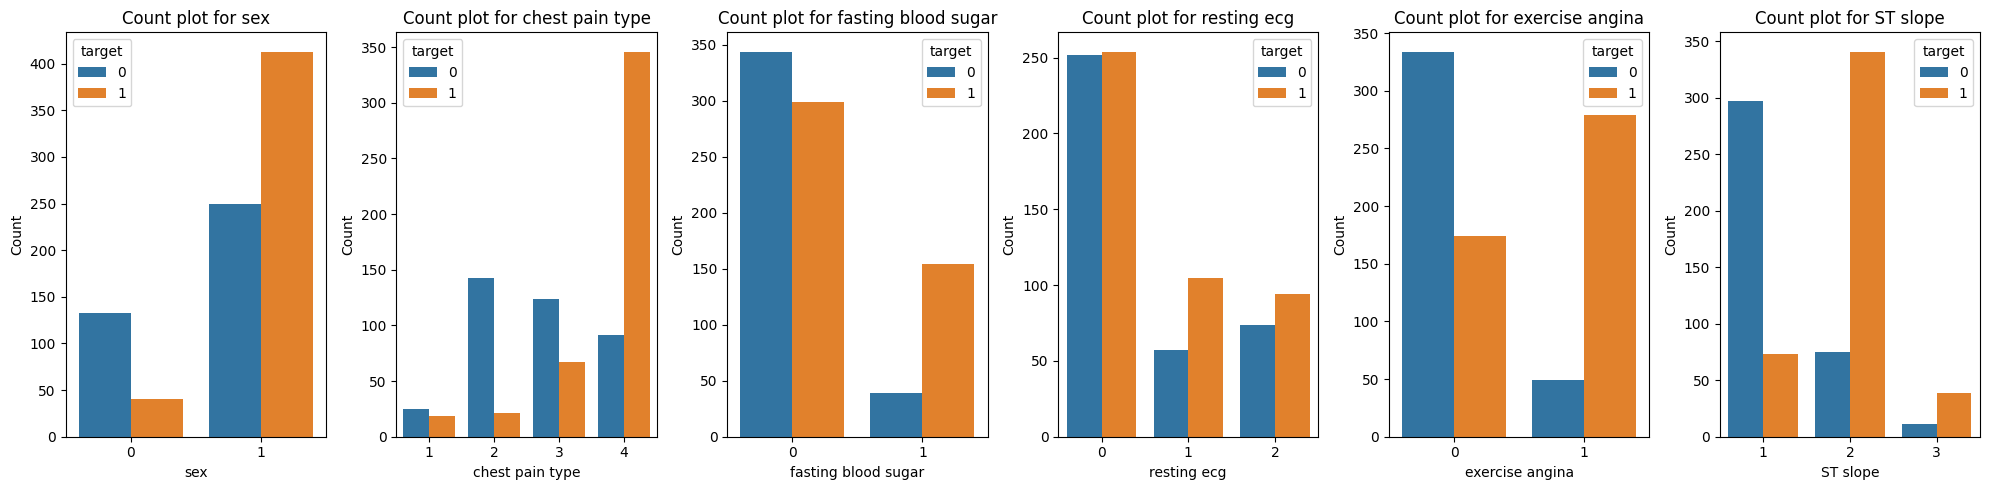

In [ ]:
# phân tích 2 biến
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 5))
for i, column in enumerate(categorical_cols):
    sns.countplot(data=data, x=column, hue='target' , ax=axes[i])
    axes[i].set_title(f'Count plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-112-1a8e7df5b6fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['target'] = data['target']


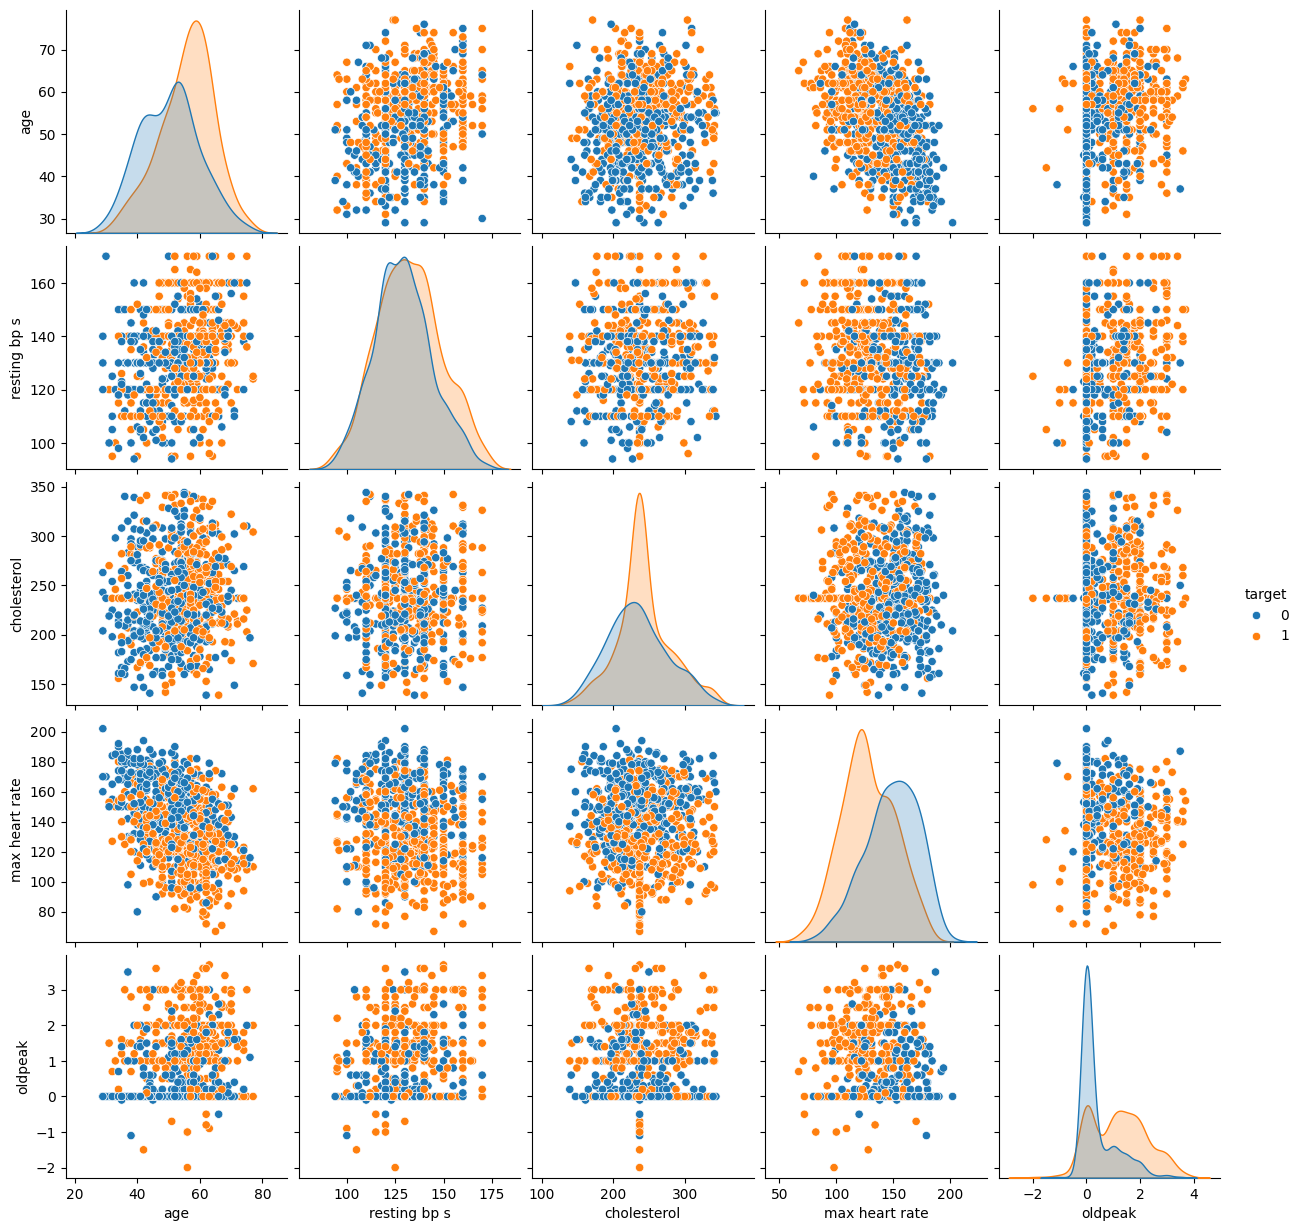

In [ ]:
# Dữ liệu liên tục
numerical_data = data[numerical_cols]
numerical_data['target'] = data['target']
sns.pairplot(numerical_data, hue= 'target')
plt.show()

### Data normalization

In [ ]:
data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# one-hot encoding
data= pd.get_dummies(data, columns=categorical_cols)
# data= data.astype(int)
# Chỉ chuyển các cột boolean sang int (0 hoặc 1)
data[data.columns[data.dtypes == 'bool']] = data[data.columns[data.dtypes == 'bool']].astype(int)
data.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_0,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
3,48,138,214,108,1.5,1,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0


## Data splitting

In [ ]:
# X,y, chia dữ liệu
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_0,sex_1,chest pain type_1,chest pain type_2,chest pain type_3,...,fasting blood sugar_0,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,172,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,49,160,180,156,1.0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
3,48,138,214,108,1.5,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,54,150,195,122,0.0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,140,241,123,0.2,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1185,45,110,264,132,1.2,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1186,68,144,193,141,3.4,0,1,0,0,0,...,0,1,1,0,0,1,0,0,1,0
1188,57,130,236,174,0.0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_0,sex_1,chest pain type_1,chest pain type_2,chest pain type_3,...,fasting blood sugar_0,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
382,50,115,237,120,0.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
507,75,136,225,112,3.0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
760,51,125,213,125,1.4,0,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
335,51,130,237,170,-0.7,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
840,63,130,330,132,1.8,0,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,35,140,167,150,0.0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
118,35,120,160,185,0.0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
301,60,160,237,149,0.4,0,1,0,0,0,...,0,1,1,0,0,1,0,0,1,0
477,51,132,218,139,0.1,0,1,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# chuẩn hóa dữ liệu (với cột giá trị thực - StandardScaler, với cột biến categorical - one-hot encoding)
columns_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
scaler = StandardScaler()
# Chuẩn hóa chỉ các cột giá trị thực trong tập huấn luyện
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
# Chuẩn hóa chỉ các cột giá trị thực trong tập kiểm tra (sử dụng các tham số từ tập huấn luyện)
X_test_scaled = scaler.transform(X_test[columns_to_scale])
# Sau khi chuẩn hóa, gán lại các cột đã chuẩn hóa vào X_train và X_test
X_train[columns_to_scale] = X_train_scaled
X_test[columns_to_scale] = X_test_scaled

## Build Model

### KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy (KNN):", accuracy_score(y_test, y_pred))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred))
print("Classification Report (KNN):\n", classification_report(y_test, y_pred))

Accuracy (KNN): 0.875
Confusion Matrix (KNN):
 [[62 15]
 [ 6 85]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        77
           1       0.85      0.93      0.89        91

    accuracy                           0.88       168
   macro avg       0.88      0.87      0.87       168
weighted avg       0.88      0.88      0.87       168



In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)

# Tìm kiếm tham số tối ưu
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters for KNN:", grid_search.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán
best_knn = grid_search.best_estimator_
y_pred_tuned_knn = best_knn.predict(X_test)

# Đánh giá mô hình sau tinh chỉnh
print("Accuracy (Tuned KNN):", accuracy_score(y_test, y_pred_tuned_knn))
print("Classification Report (Tuned KNN):\n", classification_report(y_test, y_pred_tuned_knn))
print("Confusion Matrix (Tuned KNN):\n", confusion_matrix(y_test, y_pred_tuned_knn))

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy (Tuned KNN): 0.8869047619047619
Classification Report (Tuned KNN):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        77
           1       0.85      0.96      0.90        91

    accuracy                           0.89       168
   macro avg       0.90      0.88      0.88       168
weighted avg       0.89      0.89      0.89       168

Confusion Matrix (Tuned KNN):
 [[62 15]
 [ 4 87]]


vẽ learning curve để kiểm tra vấn đề bias cao (underfitting) hoặc variance cao (overfitting)


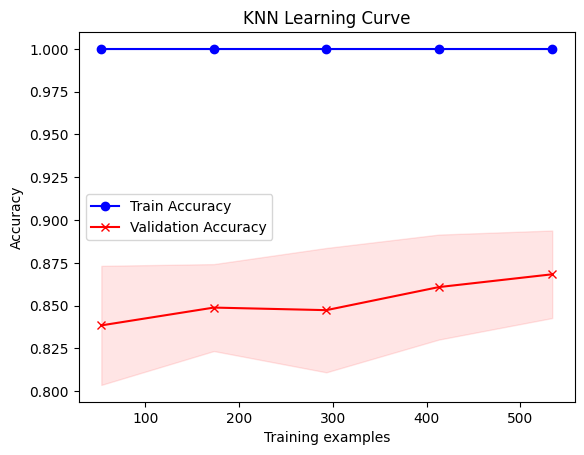

In [ ]:
from sklearn.model_selection import learning_curve
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
train_sizes = np.linspace(0.1, 1.0, 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, valid_scores = learning_curve(
    knn_best, X_train, y_train, train_sizes=train_sizes, cv=cv)
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Train Accuracy')
ax.plot(train_sizes, mean_valid_scores, 'x-', color='r', label='Validation Accuracy')

ax.fill_between(train_sizes, mean_train_scores - train_scores_std, mean_train_scores + train_scores_std, color='blue', alpha=0.1)
ax.fill_between(train_sizes, mean_valid_scores - valid_scores_std, mean_valid_scores + valid_scores_std, color='red', alpha=0.1)

ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("KNN Learning Curve")
ax.legend()

plt.show()

mô hình bị overfitting dù đã tinh chỉnh tham số với GridSearchCV

---



---



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Khởi tạo mô hình Cây quyết định
dt = DecisionTreeClassifier(random_state = 42)

# Huấn luyện mô hình
dt.fit(X_train, y_train)

# Dự đoán kết quả
y_pred_dt = dt.predict(X_test)

# Đánh giá mô hình
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.8392857142857143
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.83      0.89      0.86        91

    accuracy                           0.84       168
   macro avg       0.84      0.83      0.84       168
weighted avg       0.84      0.84      0.84       168

Confusion Matrix (Decision Tree):
 [[60 17]
 [10 81]]


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]  # Các giá trị cho max_features
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv=cv)

grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:")
print(grid_search.best_params_)

best_dt = grid_search.best_estimator_
y_pred_tuned_decision_tree = best_dt.predict(X_test)

# Đánh giá mô hình sau tinh chỉnh
print("Accuracy (Tuned Decision Tree):", accuracy_score(y_test, y_pred_tuned_decision_tree))
print("Classification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_tuned_decision_tree))
print("Confusion Matrix (Tuned Decision Tree):\n", confusion_matrix(y_test, y_pred_tuned_decision_tree))

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy (Tuned Decision Tree): 0.8809523809523809
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86        77
           1       0.86      0.93      0.89        91

    accuracy                           0.88       168
   macro avg       0.89      0.88      0.88       168
weighted avg       0.88      0.88      0.88       168

Confusion Matrix (Tuned Decision Tree):
 [[63 14]
 [ 6 85]]


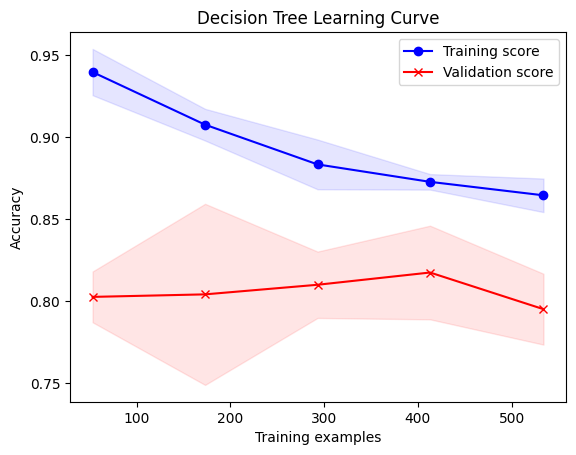

In [ ]:
tree_best = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, random_state = 42)
train_sizes, train_scores, valid_scores = learning_curve(
    tree_best,X_train,y_train,train_sizes=train_sizes, cv = cv)

mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training score')
ax.plot(train_sizes, mean_valid_scores, 'x-', color='r', label='Validation score')

# Thêm đường bao (standard deviation)
train_std = np.std(train_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

ax.fill_between(train_sizes, mean_train_scores - train_std, mean_train_scores + train_std, alpha=0.1, color='blue')
ax.fill_between(train_sizes, mean_valid_scores - valid_std, mean_valid_scores + valid_std, alpha=0.1, color='red')

ax.set_title("Decision Tree Learning Curve")
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')

plt.show()

### Hồi quy Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình hồi quy logistic
model = LogisticRegression(max_iter=1000, random_state = 42)  # max_iter tăng lên để đảm bảo hội tụ
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_logistic = model.predict(X_test)

In [ ]:
labels = ['Healthy', 'Diagnosed']

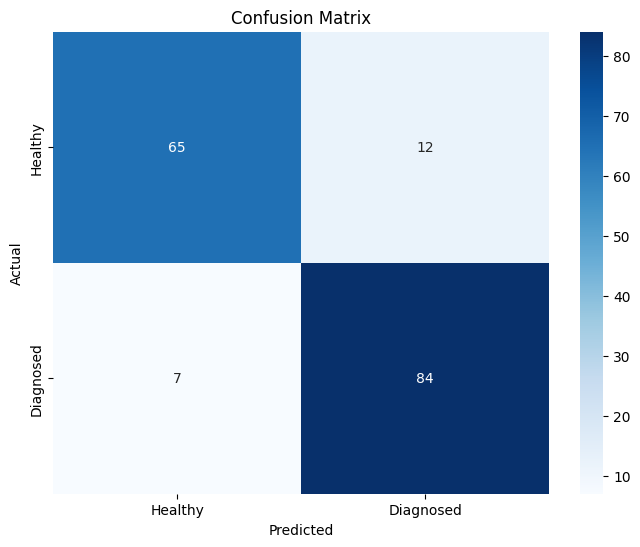

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        77
           1       0.88      0.92      0.90        91

    accuracy                           0.89       168
   macro avg       0.89      0.88      0.89       168
weighted avg       0.89      0.89      0.89       168



ROC-AUC: 0.94


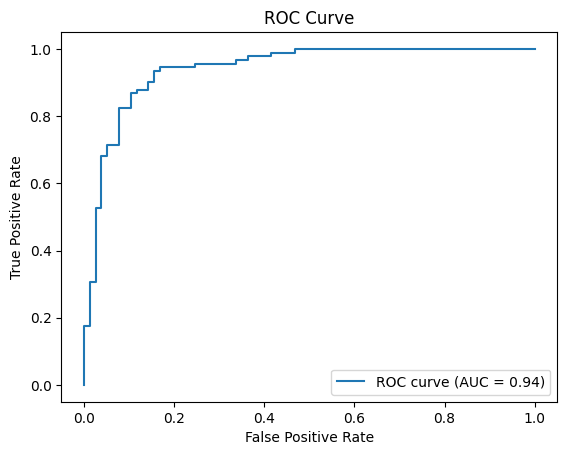

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Tính xác suất dự đoán cho lớp 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Tính chỉ số ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Vẽ đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],  # Thử các giá trị khác nhau cho C
    'max_iter': [100, 500, 1000],  # Số vòng lặp tối đa
}

# Khởi tạo GridSearchCV cho Logistic Regression
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=cv, n_jobs=-1)

# Tìm kiếm tham số tối ưu
grid_search_logistic.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán
best_logistic = grid_search_logistic.best_estimator_
y_pred_tuned_logistic = best_logistic.predict(X_test)

# Đánh giá mô hình sau tinh chỉnh
print("Accuracy (Tuned Logistic Regression):", accuracy_score(y_test, y_pred_tuned_logistic))
print("Classification Report (Tuned Logistic Regression):\n", classification_report(y_test, y_pred_tuned_logistic))
print("Confusion Matrix (Tuned Logistic Regression):\n", confusion_matrix(y_test, y_pred_tuned_logistic))

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100}
Accuracy (Tuned Logistic Regression): 0.8869047619047619
Classification Report (Tuned Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        77
           1       0.88      0.92      0.90        91

    accuracy                           0.89       168
   macro avg       0.89      0.88      0.89       168
weighted avg       0.89      0.89      0.89       168

Confusion Matrix (Tuned Logistic Regression):
 [[65 12]
 [ 7 84]]


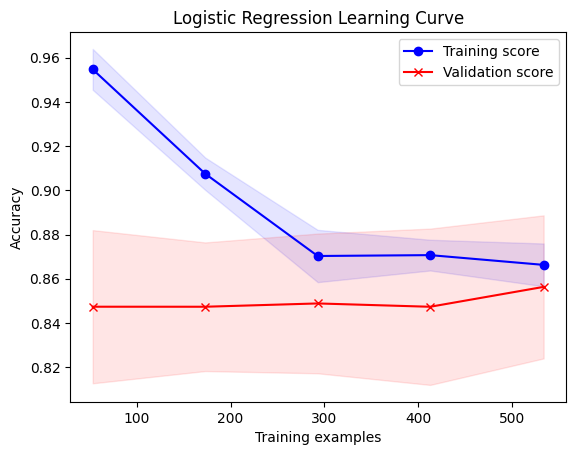

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_logistic, X_train, y_train, train_sizes=train_sizes, cv=cv)

mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ learning curve
# Tính giá trị trung bình của train_scores và valid_scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training score')
ax.plot(train_sizes, mean_valid_scores, 'x-', color='r', label='Validation score')

# Thêm đường bao (standard deviation)
train_std = np.std(train_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

ax.fill_between(train_sizes, mean_train_scores - train_std, mean_train_scores + train_std, alpha=0.1, color='blue')
ax.fill_between(train_sizes, mean_valid_scores - valid_std, mean_valid_scores + valid_std, alpha=0.1, color='red')

# Tiêu đề và nhãn
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("Logistic Regression Learning Curve")
ax.legend(loc='best')
plt.show()

### SVM


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')

Accuracy (SVM): 0.90


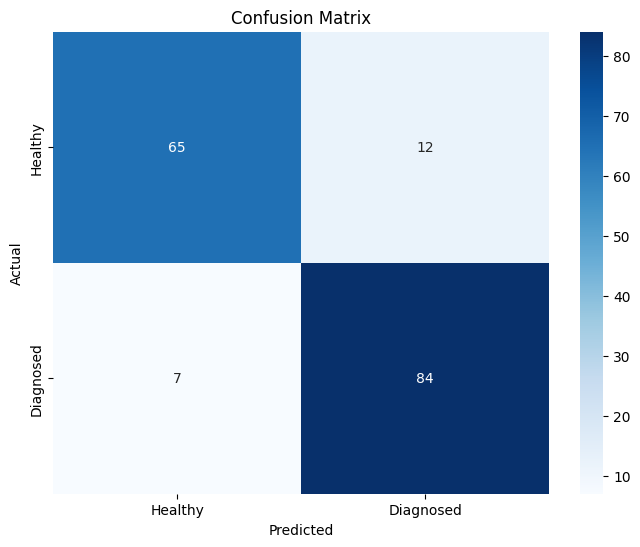

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
class_report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report (SVM):\n', class_report_svm)

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        77
           1       0.87      0.96      0.91        91

    accuracy                           0.90       168
   macro avg       0.91      0.89      0.90       168
weighted avg       0.90      0.90      0.90       168



In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Thử các giá trị khác nhau cho C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Thử các kiểu kernel khác nhau
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Thử các giá trị khác nhau cho gamma
    'degree': [3, 4, 5],  # Chỉ áp dụng cho kernel 'poly', thử các giá trị khác nhau cho degree
}

grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=cv)
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters for SVM found: {grid_search_svm.best_params_}")
# print(f"Best cross-validation score (SVM): {grid_search_svm.best_score_:.2f}")

# Dự đoán với mô hình SVM đã tinh chỉnh
best_svm_model = grid_search_svm.best_estimator_
y_pred_tuned_svm = best_svm_model.predict(X_test)

# Đánh giá mô hình SVM đã tinh chỉnh
accuracy_svm_tuned = accuracy_score(y_test, y_pred_tuned_svm)
print(f'Accuracy (Tuned SVM): {accuracy_svm_tuned:.4f}')

# Confusion Matrix for tuned SVM
conf_matrix_svm_tuned = confusion_matrix(y_test, y_pred_tuned_svm)
print('Confusion Matrix (Tuned SVM):\n', conf_matrix_svm_tuned)

# Classification Report for tuned SVM
class_report_svm_tuned = classification_report(y_test, y_pred_tuned_svm)
print('Classification Report (Tuned SVM):\n', class_report_svm_tuned)

Best parameters for SVM found: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy (Tuned SVM): 0.8988
Confusion Matrix (Tuned SVM):
 [[64 13]
 [ 4 87]]
Classification Report (Tuned SVM):
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        77
           1       0.87      0.96      0.91        91

    accuracy                           0.90       168
   macro avg       0.91      0.89      0.90       168
weighted avg       0.90      0.90      0.90       168



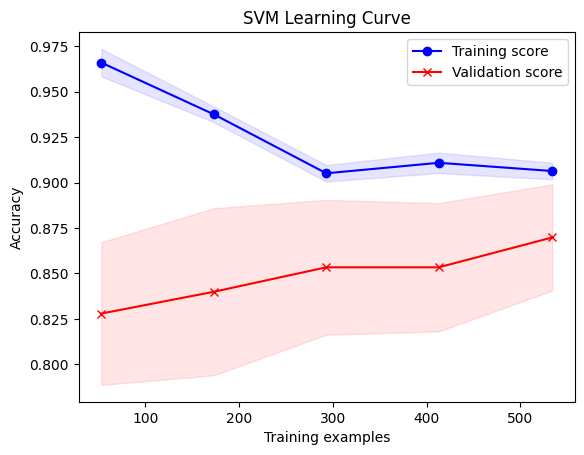

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_svm_model, X_train, y_train, train_sizes=train_sizes, cv=cv)

mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ learning curve
# Tính giá trị trung bình của train_scores và valid_scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training score')
ax.plot(train_sizes, mean_valid_scores, 'x-', color='r', label='Validation score')

# Thêm đường bao (standard deviation)
train_std = np.std(train_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

ax.fill_between(train_sizes, mean_train_scores - train_std, mean_train_scores + train_std, alpha=0.1, color='blue')
ax.fill_between(train_sizes, mean_valid_scores - valid_std, mean_valid_scores + valid_std, alpha=0.1, color='red')

# Tiêu đề và nhãn
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("SVM Learning Curve")
ax.legend(loc='best')
plt.show()

###ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Xây dựng mô hình AdaBoost với một cây quyết định làm base estimator
ada_boost1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

ada_boost1.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_ada = ada_boost1.predict(X_test)

# Đánh giá mô hình
# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy (AdaBoost): {accuracy_ada:.2f}')

# Confusion Matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print('Confusion Matrix (AdaBoost):\n', conf_matrix_ada)

# Classification Report (Precision, Recall, F1-Score)
class_report_ada = classification_report(y_test, y_pred_ada)
print('Classification Report (AdaBoost):\n', class_report_ada)

Accuracy (AdaBoost): 0.88
Confusion Matrix (AdaBoost):
 [[67 10]
 [10 81]]
Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.89      0.89      0.89        91

    accuracy                           0.88       168
   macro avg       0.88      0.88      0.88       168
weighted avg       0.88      0.88      0.88       168



In [ ]:
# Định nghĩa mô hình AdaBoost với base estimator là cây quyết định
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
param_grid_ada = {
    'estimator__max_depth': [3, 5, 7],  # Tinh chỉnh max_depth của cây quyết định
    'n_estimators': [50, 100, 150, 200],  # Số lượng estimators
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Tốc độ học
}

# Tinh chỉnh mô hình với GridSearchCV
grid_search_ada = GridSearchCV(ada_boost, param_grid_ada, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

# In ra các tham số tối ưu và điểm cross-validation
print(f"Best parameters for AdaBoost found: {grid_search_ada.best_params_}")
# print(f"Best cross-validation score (AdaBoost): {grid_search_ada.best_score_:.4f}")

best_ada = grid_search_ada.best_estimator_
# Dự đoán trên tập kiểm tra với tham số tốt nhất
y_pred_tuned_ada = best_ada.predict(X_test)

# Đánh giá mô hình đã tinh chỉnh
accuracy_ada_tuned = accuracy_score(y_test, y_pred_tuned_ada)
print(f'Accuracy (AdaBoost Tuned): {accuracy_ada_tuned:.2f}')

# Confusion Matrix
conf_matrix_ada_tuned = confusion_matrix(y_test, y_pred_tuned_ada)
print('Confusion Matrix (AdaBoost Tuned):\n', conf_matrix_ada_tuned)

# Classification Report (Precision, Recall, F1-Score)
class_report_ada_tuned = classification_report(y_test, y_pred_tuned_ada)
print('Classification Report (AdaBoost Tuned):\n', class_report_ada_tuned)


Best parameters for AdaBoost found: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}
Accuracy (AdaBoost Tuned): 0.90
Confusion Matrix (AdaBoost Tuned):
 [[65 12]
 [ 5 86]]
Classification Report (AdaBoost Tuned):
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        77
           1       0.88      0.95      0.91        91

    accuracy                           0.90       168
   macro avg       0.90      0.89      0.90       168
weighted avg       0.90      0.90      0.90       168



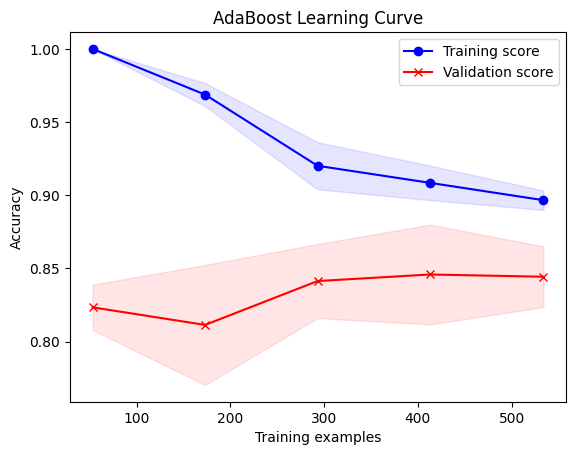

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_ada, X_train, y_train, train_sizes=train_sizes, cv=cv)

mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ learning curve
# Tính giá trị trung bình của train_scores và valid_scores
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training score')
ax.plot(train_sizes, mean_valid_scores, 'x-', color='r', label='Validation score')

# Thêm đường bao (standard deviation)
train_std = np.std(train_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

ax.fill_between(train_sizes, mean_train_scores - train_std, mean_train_scores + train_std, alpha=0.1, color='blue')
ax.fill_between(train_sizes, mean_valid_scores - valid_std, mean_valid_scores + valid_std, alpha=0.1, color='red')

# Tiêu đề và nhãn
ax.set_xlabel("Training examples")
ax.set_ylabel("Accuracy")
ax.set_title("AdaBoost Learning Curve")
ax.legend(loc='best')
plt.show()

#SO SÁNH CÁC MÔ HÌNH

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
)
data = {
    'KNN': y_pred,
    'Decision Tree': y_pred_dt,
    'Logistic Regression': y_pred_logistic,
    'SVM': y_pred_tuned_svm,
    'Adaboost': y_pred_tuned_ada,
}
models = pd.DataFrame(data)
model_results = pd.DataFrame()  # DataFrame lưu kết quả evaluation metrics
for column in models:
    cm = confusion_matrix(y_test, models[column])
    TN, FP = cm[0][0], cm[0][1]
    FN, TP = cm[1][0], cm[1][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])  # Log Loss
    acc = accuracy_score(y_test, models[column])  # Accuracy
    roc = roc_auc_score(y_test, models[column])  # ROC-AUC
    prec = precision_score(y_test, models[column])  # Precision
    rec = recall_score(y_test, models[column])  # Recall
    f1 = f1_score(y_test, models[column])  # F1-Score

    results = pd.DataFrame(
        [[column, acc, prec, rec, specificity, f1, roc, loss_log ]],
        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss']
    )
    model_results = pd.concat([model_results, results], ignore_index=True)

In [ ]:
model_results

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
0,KNN,0.875000,0.850000,0.934066,0.805195,0.890052,0.869630,4.505457
1,Decision Tree,0.839286,0.826531,0.890110,0.779221,0.857143,0.834665,5.792730
2,Logistic Regression,0.886905,0.875000,0.923077,0.844156,0.898396,0.883616,4.076366
3,SVM,0.898810,0.870000,0.956044,0.831169,0.910995,0.893606,3.647274
4,Adaboost,0.898810,0.877551,0.945055,0.844156,0.910053,0.894605,3.647274


In [ ]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
)
data = {
    'KNN': y_pred_tuned_knn,
    'Decision Tree': y_pred_tuned_decision_tree,
    'Logistic Regression': y_pred_tuned_logistic,
    'SVM': y_pred_tuned_svm,
    'Adaboost': y_pred_tuned_ada,
}
models = pd.DataFrame(data)
model_results = pd.DataFrame()  # DataFrame lưu kết quả evaluation metrics
for column in models:
    cm = confusion_matrix(y_test, models[column])
    TN, FP = cm[0][0], cm[0][1]
    FN, TP = cm[1][0], cm[1][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])  # Log Loss
    acc = accuracy_score(y_test, models[column])  # Accuracy
    roc = roc_auc_score(y_test, models[column])  # ROC-AUC
    prec = precision_score(y_test, models[column])  # Precision
    rec = recall_score(y_test, models[column])  # Recall
    f1 = f1_score(y_test, models[column])  # F1-Score

    results = pd.DataFrame(
        [[column, acc, prec, rec, specificity, f1, roc, loss_log ]],
        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss']
    )
    model_results = pd.concat([model_results, results], ignore_index=True)

In [ ]:
model_results

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
0,KNN,0.886905,0.852941,0.956044,0.805195,0.901554,0.880619,4.076366
1,Decision Tree,0.880952,0.858586,0.934066,0.818182,0.894737,0.876124,4.290911
2,Logistic Regression,0.886905,0.875000,0.923077,0.844156,0.898396,0.883616,4.076366
3,SVM,0.898810,0.870000,0.956044,0.831169,0.910995,0.893606,3.647274
4,Adaboost,0.898810,0.877551,0.945055,0.844156,0.910053,0.894605,3.647274


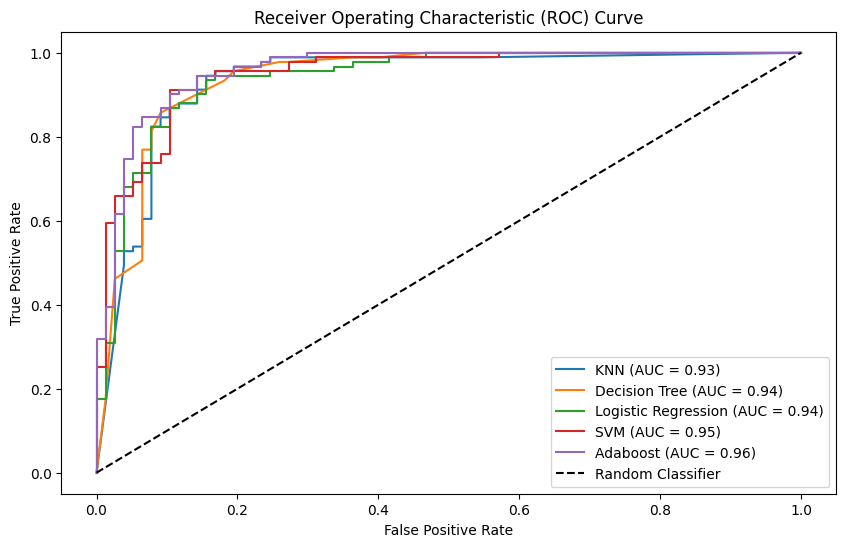

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))
models_dict = {
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Logistic Regression': best_logistic,
    'SVM': best_svm_model,
    'Adaboost': best_ada ,
}
for model_name, model in models_dict.items():
    # Lấy xác suất cho lớp dương (class 1) từ predict_proba()
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Tính FPR, TPR và thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Tính AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Vẽ đường chéo (ngẫu nhiên)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Các cài đặt cho biểu đồ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Hiển thị biểu đồ
plt.show()

AdaBoost có giá trị AUC cao nhất (0.9), cho thấy mô hình này có hiệu suất tốt
nhất trong số các mô hình được so sánh.

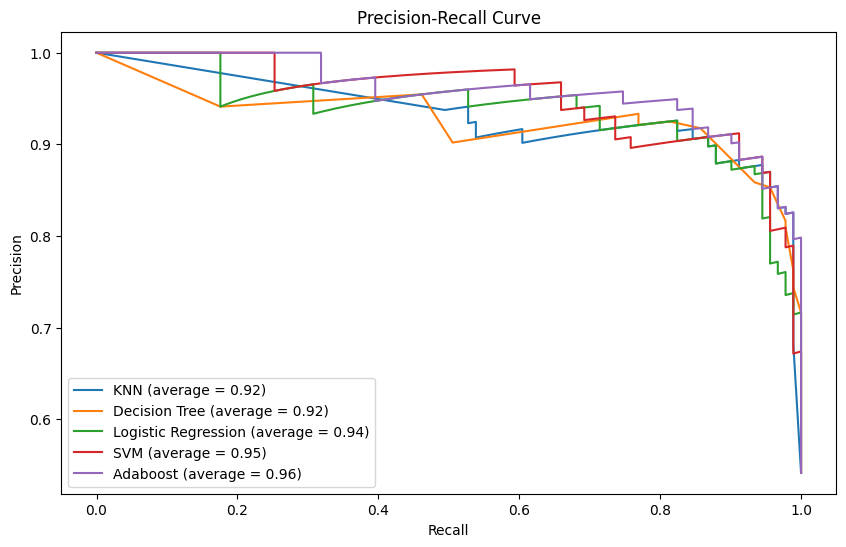

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model_name, model in models_dict.items():
    # Lấy xác suất cho lớp dương (class 1) từ predict_proba()
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Tính precision, recall và thresholds
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    # Tính Average Precision (AP)
    average_precision = average_precision_score(y_test, y_pred_prob)

    # Vẽ Precision-Recall Curve
    plt.plot(recall, precision, label=f'{model_name} (average = {average_precision:.2f})')

# Thiết lập các thông số đồ thị
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

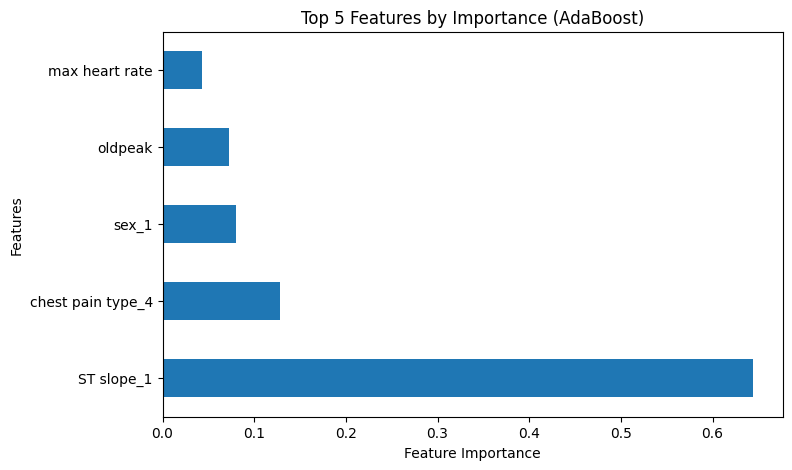

In [ ]:
best_ada_model = grid_search_ada.best_estimator_
feature_importances_ada = best_ada_model.estimators_[0].feature_importances_
# Chuyển thành DataFrame
feat_importances_ada = pd.Series(feature_importances_ada, index=X_train.columns)

# Vẽ các đặc trưng quan trọng nhất (Top 5)
plt.figure(figsize=(8, 5))
feat_importances_ada.nlargest(5).plot(kind='barh')  # Lấy Top 5
plt.title('Top 5 Features by Importance (AdaBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

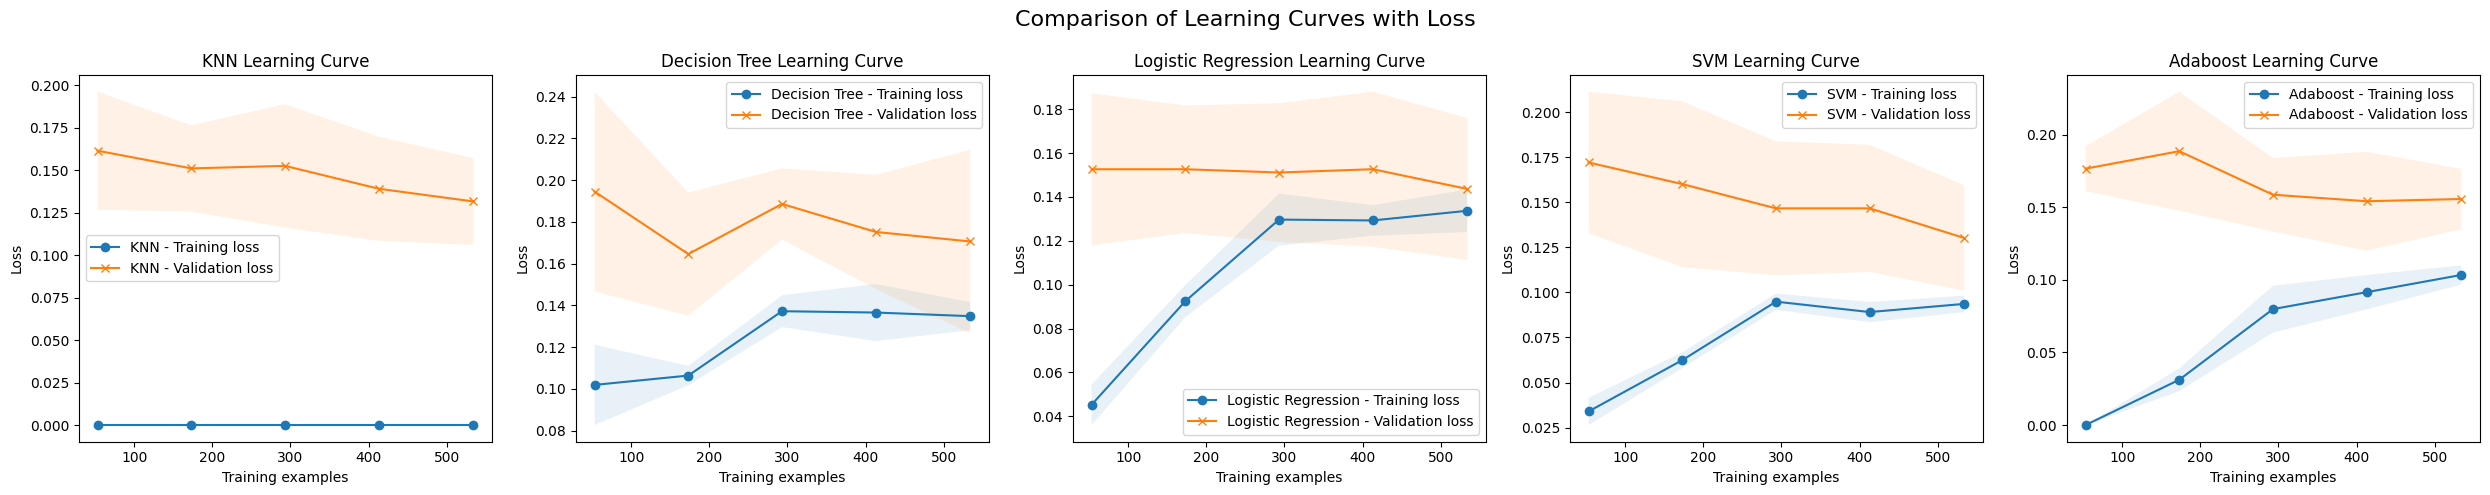

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X_train, y_train, cv, train_sizes, title):
    # Số lượng mô hình
    num_models = len(models)

    # Tạo một figure với các subplots trên cùng một hàng
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))

    # Chuyển axes thành mảng nếu chỉ có một mô hình
    if num_models == 1:
        axes = [axes]

    # Lặp qua các mô hình và vẽ từng Learning Curve
    for i, (label, model) in enumerate(models.items()):
        # Tính Learning Curve
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X_train, y_train, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
        )

        # Tính trung bình và độ lệch chuẩn của loss
        mean_train_loss = -np.mean(train_scores, axis=1)  # Chuyển sang giá trị dương vì dùng neg_mean_squared_error
        mean_valid_loss = -np.mean(valid_scores, axis=1)
        train_std = np.std(-train_scores, axis=1)
        valid_std = np.std(-valid_scores, axis=1)

        # Vẽ đường trung bình của train và validation loss
        axes[i].plot(train_sizes, mean_train_loss, 'o-', label=f'{label} - Training loss')
        axes[i].plot(train_sizes, mean_valid_loss, 'x-', label=f'{label} - Validation loss')

        # Vẽ vùng sai số (standard deviation)
        axes[i].fill_between(train_sizes, mean_train_loss - train_std, mean_train_loss + train_std, alpha=0.1)
        axes[i].fill_between(train_sizes, mean_valid_loss - valid_std, mean_valid_loss + valid_std, alpha=0.1)

        # Thêm nhãn và tiêu đề cho từng mô hình
        axes[i].set_xlabel("Training examples")
        axes[i].set_ylabel("Loss")
        axes[i].set_title(f"{label} Learning Curve")
        axes[i].legend(loc='best')

    # Thêm tiêu đề chính cho toàn bộ figure
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Điều chỉnh phần trên để hiển thị tiêu đề chính
    plt.show()

# Ví dụ sử dụng (thay thế models_dict, X_train, y_train, cv, train_sizes bằng dữ liệu thực tế):
plot_learning_curves(models_dict, X_train, y_train, cv, train_sizes, "Comparison of Learning Curves with Loss")


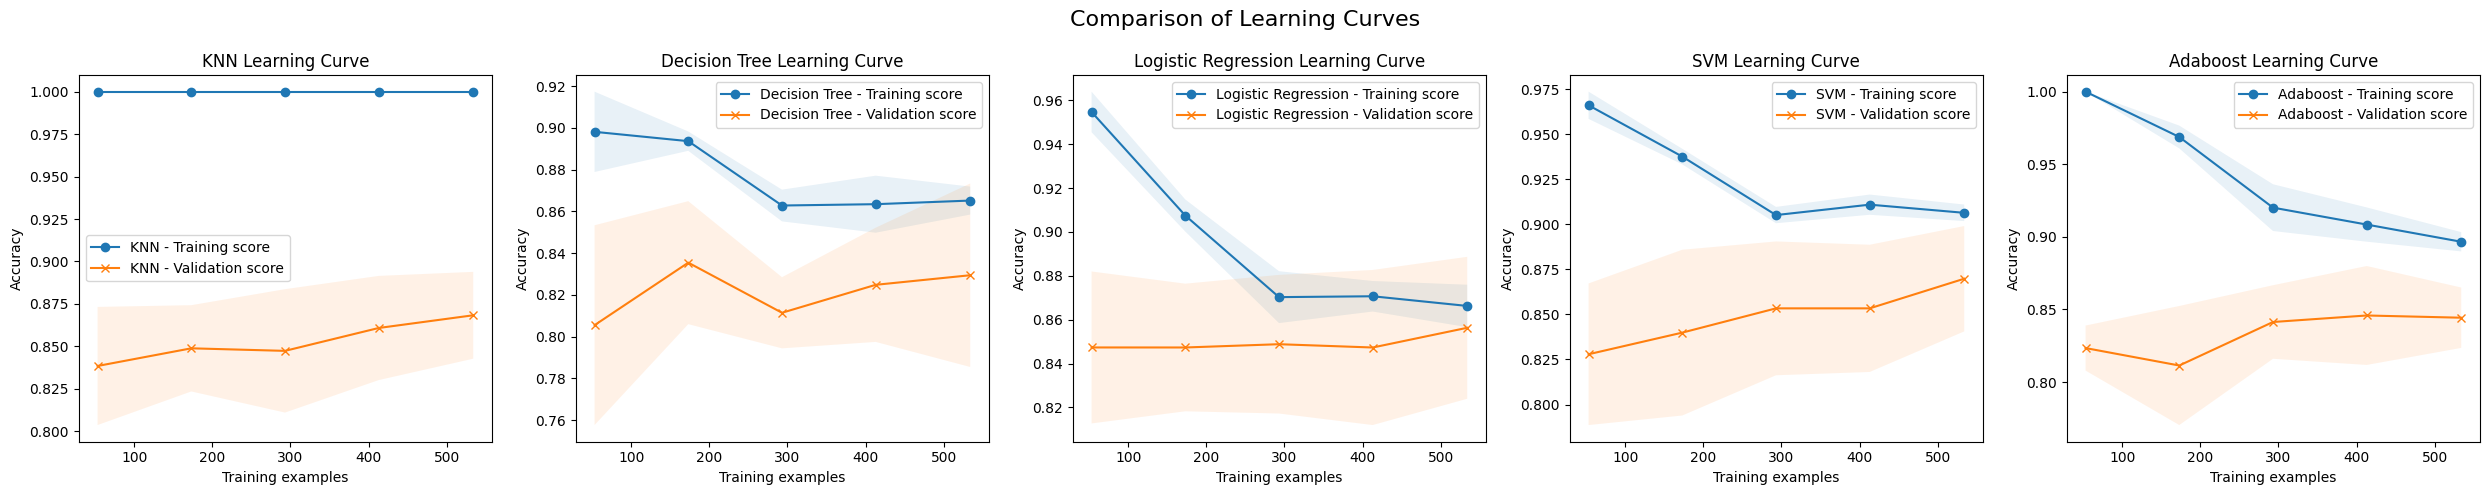

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X_train, y_train, cv, train_sizes, title):
    # Calculate the number of models
    num_models = len(models)

    # Create a figure with subplots in a single row
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))

    # If there is only one model, axes will not be an array, so convert it to an array
    if num_models == 1:
        axes = [axes]

    # Loop over models and their corresponding axes
    for i, (label, model) in enumerate(models.items()):
        # Calculate learning curve
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X_train, y_train, train_sizes=train_sizes, cv=cv
        )

        # Mean of train and validation scores
        mean_train_scores = np.mean(train_scores, axis=1)
        mean_valid_scores = np.mean(valid_scores, axis=1)

        # Plot training and validation scores on the respective axis
        axes[i].plot(train_sizes, mean_train_scores, 'o-', label=f'{label} - Training score')
        axes[i].plot(train_sizes, mean_valid_scores, 'x-', label=f'{label} - Validation score')

        # Standard deviation for shaded area
        train_std = np.std(train_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)
        axes[i].fill_between(train_sizes, mean_train_scores - train_std, mean_train_scores + train_std, alpha=0.1)
        axes[i].fill_between(train_sizes, mean_valid_scores - valid_std, mean_valid_scores + valid_std, alpha=0.1)

        # Add labels and title
        axes[i].set_xlabel("Training examples")
        axes[i].set_ylabel("Accuracy")
        axes[i].set_title(f"{label} Learning Curve")
        axes[i].legend(loc='best')

    # Add a super title for the whole figure
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust the top to fit the suptitle
    plt.show()

# Example usage (replace with actual models and data):

plot_learning_curves(models_dict, X_train, y_train, cv, train_sizes, "Comparison of Learning Curves")


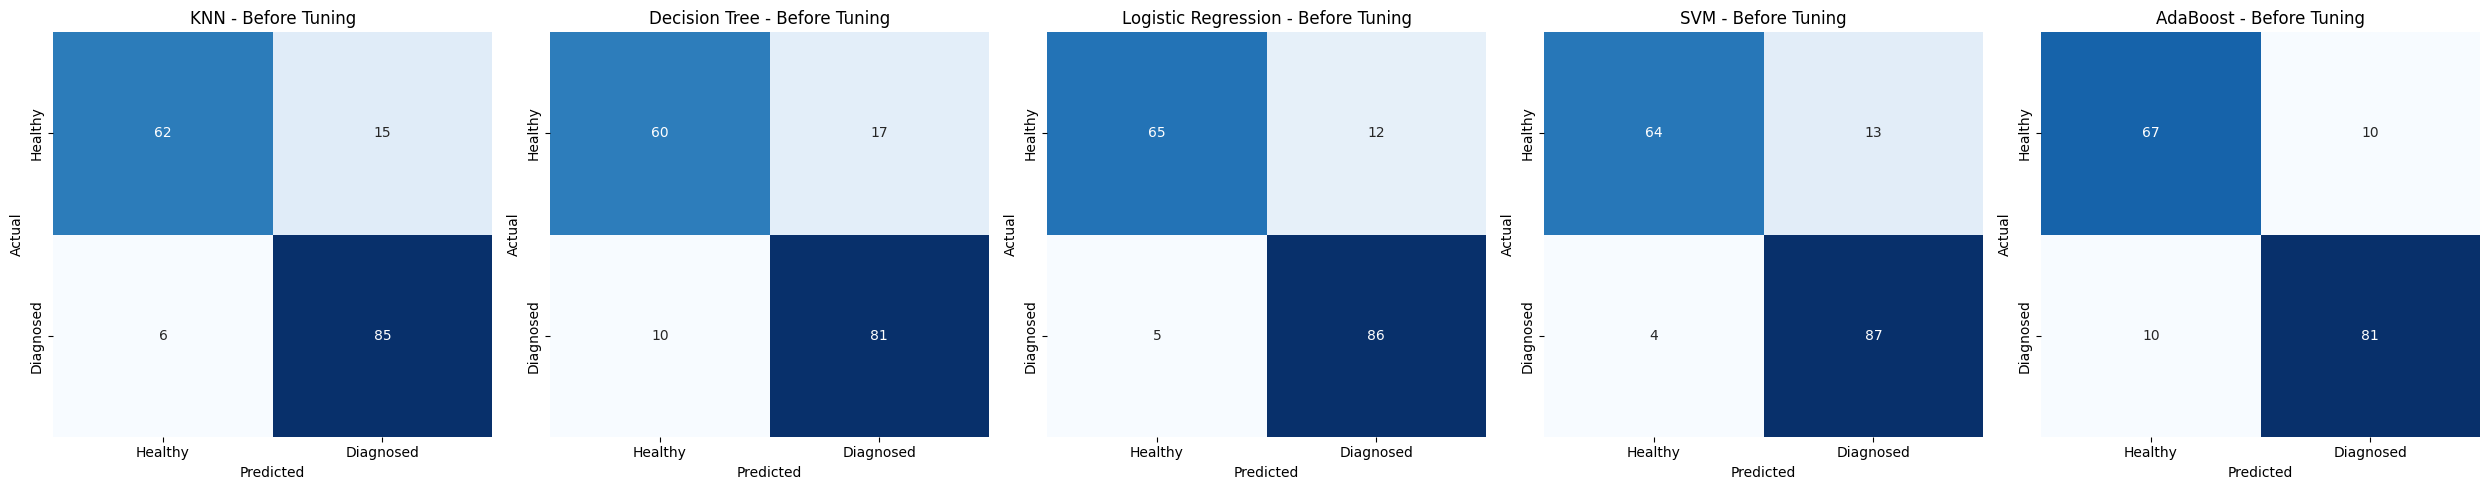

In [ ]:
models = {
    "KNN": (knn, best_knn),
    "Decision Tree": (dt, best_dt),
    "Logistic Regression": (model, best_logistic),
    "SVM": (svm, best_svm_model),
    "AdaBoost": (ada_boost1, best_ada),
}

labels = ['Healthy', 'Diagnosed']
# Confusion Matrix trước tinh chỉnh
plt.figure(figsize=(25, 5))  # Tăng chiều ngang để phù hợp với 5 ô
for i, (model_name, (model_before, _)) in enumerate(models.items()):

    # Dự đoán trước tinh chỉnh
    y_pred_before = model_before.predict(X_test)
    conf_matrix_before = confusion_matrix(y_test, y_pred_before)

    # Plot Confusion Matrix trước tinh chỉnh
    plt.subplot(1, len(models), i + 1)  # Tất cả các ô trên một hàng
    sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title(f"{model_name} - Before Tuning")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


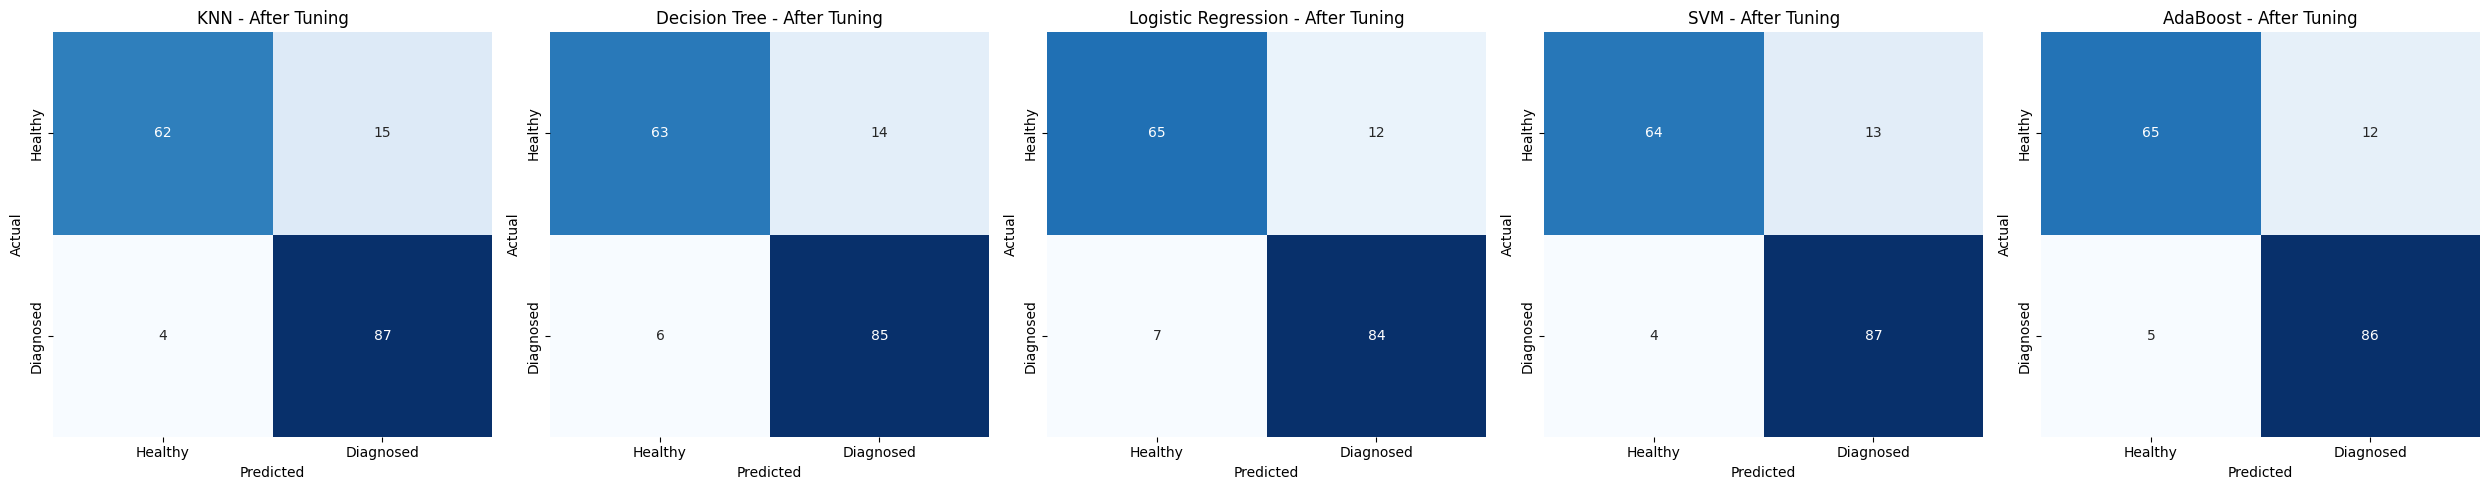

In [ ]:
# Confusion Matrix sau tinh chỉnh
plt.figure(figsize=(25, 5))
for i, (model_name, (_, model_after)) in enumerate(models.items()):  # Chỉ sử dụng model_after

    # Dự đoán sau tinh chỉnh
    y_pred_after = model_after.predict(X_test)
    conf_matrix_after = confusion_matrix(y_test, y_pred_after)

    plt.subplot(1, len(models), i + 1)
    sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title(f"{model_name} - After Tuning")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
